<a href="https://colab.research.google.com/github/vasanthi2469/Python-Training/blob/main/Clustering%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step -1 **
### Load the dataset

In [24]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
DS = pd.read_csv("/content/Universities (1).csv")

## **Summary**
This reads the CSV file located at file_path into a pandas DataFrame named **DS**

#**Step -2 **
### Get the shape of the dataset

In [6]:
DS.shape

(1302, 20)

summary of the dataset:

Total Records: 1,302

Key Features:

College Name, State: Identifiers/categoricals

Public (1)/ Private (2): Categorical (1 or 2)

    #appli. rec'd, # appl. accepted, # new stud. enrolled: Admission statistics

% new stud. from top 10%/25%: Academic caliber

in-/out-of-state tuition, room, board, add. fees: Cost-related fields

estim. book costs, estim. personal $: Additional expenses

% fac. w/PHD, stud./fac. ratio, Graduation rate: Academic resources and outcomes
Interesting Ranges:

Tuition varies from $ 480 to $ 25,750

Graduation rate goes up to 118% (likely a data issue)

Student/faculty ratio ranges from 2.3 to 91.8

#**Step -3 **
### Check data types


In [3]:
data_types = DS.dtypes
data_types

,0
College Name,object
State,object
Public (1)/ Private (2),int64
# appli. rec'd,float64
# appl. accepted,float64
# new stud. enrolled,float64
% new stud. from top 10%,float64
% new stud. from top 25%,float64
# FT undergrad,float64
# PT undergrad,float64


# **Summary**
**object type**

These are typically textual/categorical data.

College Name – Text representing the names of colleges.

State – Text abbreviations of U.S. states (e.g., "NY", "CA").

**int64 type**

This is an integer type (whole numbers, no decimals).

Public (1)/ Private (2) – A categorical flag stored as an integer:

1 → Public university

2 → Private university

**float64 type**

These are decimal numbers (floating point), and this type also allows for missing values (NaN), which is why many numeric columns use it.

**Examples include:**

    # appli. rec'd – Number of applications received

    # appl. accepted – Number of applications accepted

    # new stud. enrolled – Number of new students enrolled

% new stud. from top 10% – Percent of new students from the top 10% of their high school class

in-state tuition, out-of-state tuition, room, board, etc. – Cost-related fields

% fac. w/PHD – Percentage of faculty with PhDs

stud./fac. ratio – Student-to-faculty ratio

Graduation rate – Graduation rate (usually as a percentage)

**Float64**

You might wonder why fields like # appl. accepted aren't int64 since they're counts. The reason is missing values:

When any column has NaN values, pandas defaults to float64 to accommodate both numbers and NaN.



#**Step -4 **
## Conversion of Data types

#**Step -4.1 **
## Dictionary to store the changes for summary

In [4]:
conversion_summary = {}

#**Step -4.2 **
## 1. Convert object to category (for categorical string values)

In [6]:
for col in ['College Name', 'State']:
    original_dtype = DS[col].dtype
    DS[col] = DS[col].astype('category')
    conversion_summary[col] = (original_dtype, DS[col].dtype)

#Summary
***Purpose:***

To convert the columns College Name and State from object (string) type to category type for efficiency.

**Loop Through Columns:**

The for loop iterates over two columns: 'College Name' and 'State'.

Check Original Data Type:

original_dtype = DS[col].dtype stores the current data type (which is object) of the column.

**Convert to Category:**

DS[col] = DS[col].astype('category') converts the column to the category type.

This improves memory efficiency and speeds up processing when dealing with repeated string values.

**Track the Change:**

conversion_summary[col] = (original_dtype, DS[col].dtype) saves a record of the conversion in a dictionary.

**For example:**
conversion_summary['State'] = (dtype('O'), CategoricalDtype(categories=..., ordered=False))

We use category for

**Memory Efficient:**Stores repeated values only once.

**Faster Operations:**Speeds up grouping, filtering, and comparisons.

**Useful for ML Models**: Some algorithms benefit from categorical encoding.



#**Step -4.3 **
## Convert float64 columns representing counts to integers (int64)
## These columns should contain whole numbers but were float due to NaN

In [7]:
count_columns = [
    '# appli. rec\'d', '# appl. accepted', '# new stud. enrolled',
    '# FT undergrad', '# PT undergrad'
]
for col in count_columns:
    original_dtype = DS[col].dtype
    DS[col] = DS[col].dropna().astype('int64')
    conversion_summary[col] = (original_dtype, DS[col].dtype)

# Summary
count_columns = [...]

A list of column names is defined.

These columns represent values that should be whole numbers (like counts of students or applications), but are currently stored as float64 due to the presence of missing (NaN) values.

for col in count_columns:

A loop is used to iterate through each of the count-related columns in the list.

original_dtype = DS[col].dtype

The original data type (float64) of the column is stored for later reference (to track changes).

DS[col] = DS[col].dropna().astype('int64')

dropna() removes rows with missing values in that specific column.

.astype('int64') converts the remaining (non-null) values to integers.

The result is assigned back to the same column in the DS DataFrame.

⚠️ Note: This will result in fewer rows in those specific columns—only non-null rows remain. If other columns still contain data in those rows, this will lead to misalignment.

conversion_summary[col] = (original_dtype, DS[col].dtype)

The conversion_summary dictionary is updated to track what the column's data type was and what it has become.

**Example:** '# appli. rec\'d': (float64, int64)



It's particularly done because :

These values should naturally be integers (e.g., number of students).

Originally stored as float64 due to NaN presence.

Converting to int64 optimizes memory and reflects the correct data type.

#**Step -4.4 **
##Convert percentage columns to integer percentages

In [8]:
percentage_columns = [
    '% new stud. from top 10%', '% new stud. from top 25%',
    '% fac. w/PHD', 'Graduation rate'
]
for col in percentage_columns:
    original_dtype = DS[col].dtype
    DS[col] = DS[col].dropna().astype('int64')
    conversion_summary[col] = (original_dtype, DS[col].dtype)

# **Summary**
**Define percentage columns:**

    percentage_columns = [...]

This creates a list of columns that represent percentages.

These columns were originally stored as float64 due to the presence of decimals or missing values.

**Loop through each column in the list:**


    for col in percentage_columns:
The loop processes each column one at a time for conversion.

**Store the original data type:**

    original_dtype = DS[col].dtype
Before conversion, the original data type (likely float64) is stored so changes can be tracked later.

**Drop missing values and convert to int64:**

    DS[col] = DS[col].dropna().astype('int64')
.dropna() removes rows with NaN values from that specific column.

.astype('int64') converts the non-null values from float to integer (e.g., 85.0 → 85).


**⚠️ Important:** This replaces the full column in DS, but only with rows that had non-null values. It may lead to mismatched lengths or unintended data loss.

**Record the conversion in a summary dictionary:**


    conversion_summary[col] = (original_dtype, DS[col].dtype)
This logs the data type change for each column for future reference or reporting.



#**Step -4.5 **
## Leave monetary and ratio values as float64 (precision needed)
## These are: tuition, room, board, fees, book costs, personal $, student/faculty ratio



In [9]:
conversion_summary

{'College Name': (CategoricalDtype(categories=['Abilene Christian University', 'Adams State College',
                    'Adelphi University', 'Adrian College',
                    'Agnes Scott College', 'Alabama Agri. & Mech. Univ.',
                    'Alabama State University', 'Alaska Pacific University',
                    'Albany State College', 'Albertson College',
                    ...
                    'Woodbury University', 'Worcester Polytechnic Institute',
                    'Worcester State College', 'Wright State University',
                    'Xavier University', 'Xavier University of Louisiana',
                    'Yale University', 'Yeshiva University',
                    'York College of Pennsylvania',
                    'Youngstown State University'],
  , ordered=False, categories_dtype=object),
  CategoricalDtype(categories=['Abilene Christian University', 'Adams State College',
                    'Adelphi University', 'Adrian College',
               

#**Step -5.1 **
## Checking missing values in the dataset

In [11]:
missing_values = DS.isnull().sum()


#**Step -5.2 **
## Filter and display only the columns with missing values

In [12]:
missing_values = missing_values[missing_values > 0]
print(missing_values)

# appli. rec'd               10
# appl. accepted             11
# new stud. enrolled          5
% new stud. from top 10%    235
% new stud. from top 25%    202
# FT undergrad                3
# PT undergrad               32
in-state tuition             30
out-of-state tuition         20
room                        321
board                       498
add. fees                   274
estim. book costs            48
estim. personal $           181
% fac. w/PHD                 32
stud./fac. ratio              2
Graduation rate              98
dtype: int64


#**Step -5.3 **
## Calculate percentage of missing values per column

In [13]:
total_rows = len(DS)
(DS.isnull().sum() / total_rows) * 100

,0
College Name,0.000000
State,0.000000
Public (1)/ Private (2),0.000000
# appli. rec'd,0.768049
# appl. accepted,0.844854
# new stud. enrolled,0.384025
% new stud. from top 10%,18.049155
% new stud. from top 25%,15.514593
# FT undergrad,0.230415
# PT undergrad,2.457757


#**Step -6.1 **


##Filling the missing values with mean

In [21]:

numeric_cols = DS.select_dtypes(include=['number']).columns

#**Step -6.2 **
## Fill missing values with the mean value of each numeric column

In [18]:
DS[numeric_cols] = DS[numeric_cols].fillna(DS[numeric_cols].mean())

#**Step -6.3 **
## Save the updated DataFrame to a new CSV file

In [19]:
DS.to_csv('Universities_filled.csv', index=False)

In [20]:
DS

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.000000,55.0,16.000000,44.00,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.000000,800.000000,1500.000000,76.0,11.9,15.000000
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.000000,928.0,25.671978,52.35,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.000000,650.000000,2304.000000,67.0,10.0,60.405316
2,University of Alaska Southeast,AK,1,146.0,117.000000,89.0,4.000000,24.00,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.000000,500.000000,1162.000000,39.0,9.5,39.000000
3,University of Alaska at Anchorage,AK,1,2065.0,1598.000000,1162.0,25.671978,52.35,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.000000,580.000000,1260.000000,48.0,13.7,60.405316
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.000000,984.0,25.671978,52.35,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.000000,500.000000,850.000000,53.0,14.3,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,West Virginia State College,WV,1,1869.0,1870.683191,957.0,25.671978,52.35,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.000000,750.000000,750.000000,38.0,19.2,60.405316
1298,West Virginia University,WV,1,9630.0,7801.000000,2881.0,23.000000,49.00,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,392.012646,549.972887,1389.291704,83.0,13.4,57.000000
1299,West Virginia Wesleyan College,WV,2,1566.0,1400.000000,483.0,28.000000,55.00,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,392.012646,450.000000,1100.000000,58.0,16.4,67.000000
1300,Wheeling Jesuit College,WV,2,903.0,755.000000,213.0,15.000000,49.00,971.0,305.0,10500.0,10500.0,2100.0,2445.0,392.012646,600.000000,600.000000,66.0,14.1,72.000000


#**Step -7**
## Checking duplicate values from the data set

In [22]:
DS.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1297,False
1298,False
1299,False
1300,False


# **Summary
I checked the dataset for duplicate values, and it appears there are no duplicate rows in the dataset. The DataFrame is free of duplicates.**

#**Step -7 **
# EDA
**##Visualization**

#**Step -7.1 **
##Visualization 1: Distribution of In-State Tuition Fees


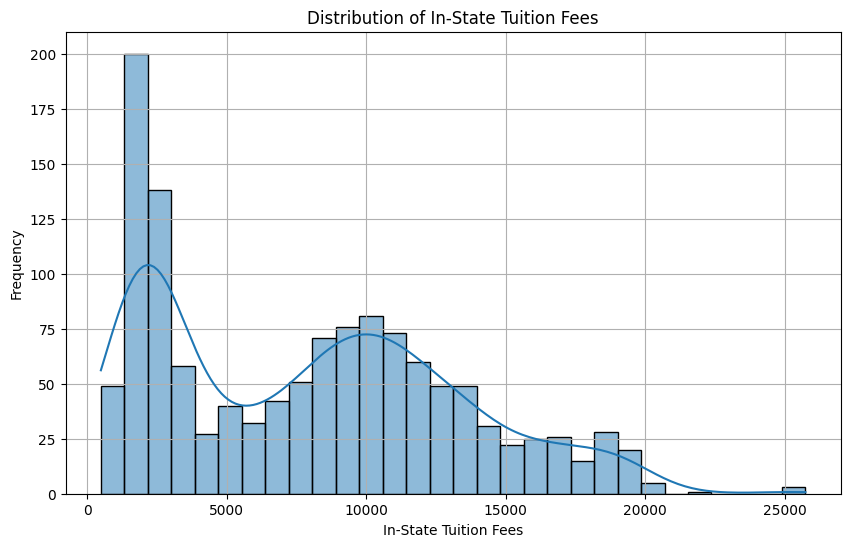

In [26]:
import pandas as pd
import matplotlib.pyplot as plt  # Import the pyplot submodule
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(DS['in-state tuition'], kde=True, bins=30)
plt.title('Distribution of In-State Tuition Fees')
plt.xlabel('In-State Tuition Fees')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#Summary
plt.figure(figsize=(10, 6)): Sets the size of the figure.

sns.histplot(DS['in-state tuition'], kde=True, bins=30): Creates a histogram with a kernel density estimate (KDE) for the 'in-state tuition' column, using 30 bins.

plt.title('Distribution of In-State Tuition Fees'): Sets the title of the plot.

plt.xlabel('In-State Tuition Fees'): Labels the x-axis.

plt.ylabel('Frequency'): Labels the y-axis.

plt.grid(True): Adds a grid to the plot.

plt.show(): Displays the plot.

#**Step -7.2 **
##Visualization 2: . Distribution of Out-of-State Tuition Fees


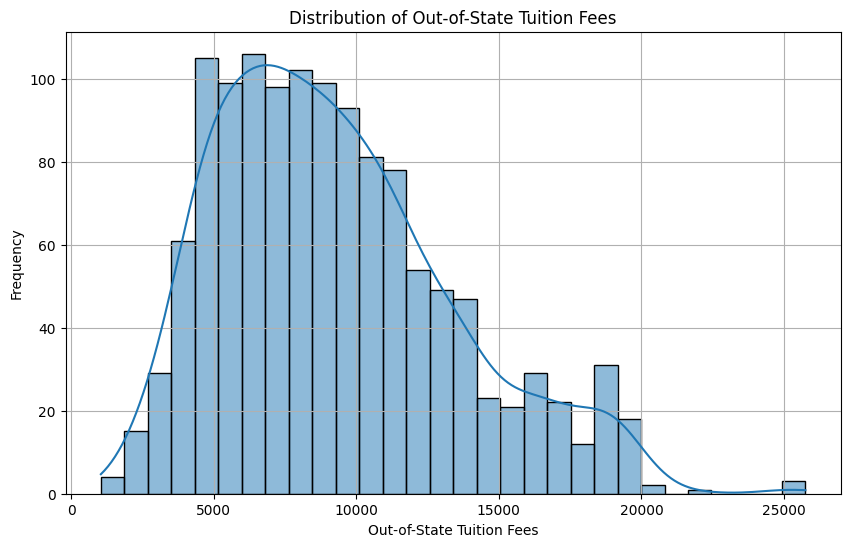

In [27]:

plt.figure(figsize=(10, 6))
sns.histplot(DS['out-of-state tuition'], kde=True, bins=30)
plt.title('Distribution of Out-of-State Tuition Fees')
plt.xlabel('Out-of-State Tuition Fees')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#Summary
Similar to the first plot, but for the 'out-of-state tuition' column.

#**Step -7.3 **
##Visualization 3: .  Graduation Rate vs. In-State Tuition Fees


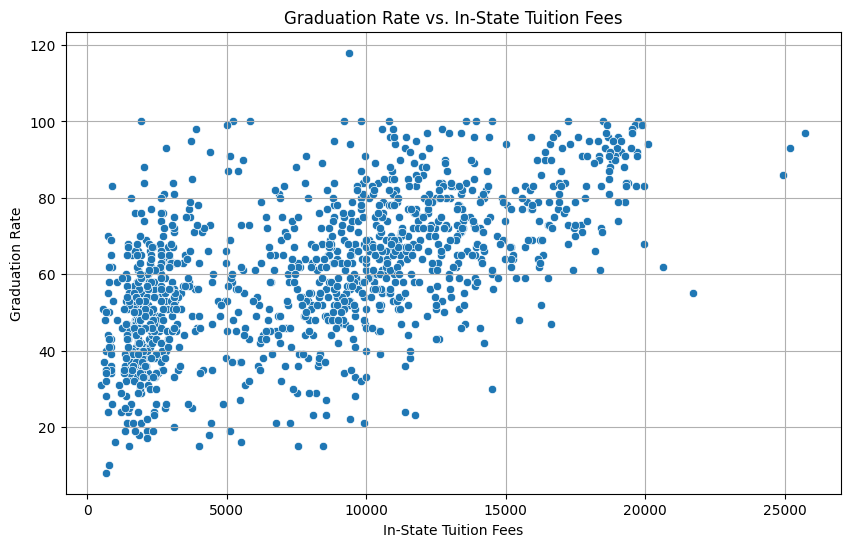

In [28]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=DS['in-state tuition'], y=DS['Graduation rate'])
plt.title('Graduation Rate vs. In-State Tuition Fees')
plt.xlabel('In-State Tuition Fees')
plt.ylabel('Graduation Rate')
plt.grid(True)
plt.show()


#summary
**sns.scatterplot(x=DS['in-state tuition'], y=DS['Graduation rate']):**Creates a scatter plot with 'in-state tuition' on the x-axis and 'Graduation rate' on the y-axis.



#**Step -7.4 **
##Visualization 4: . Graduation Rate vs. Out-of-State Tuition Fees



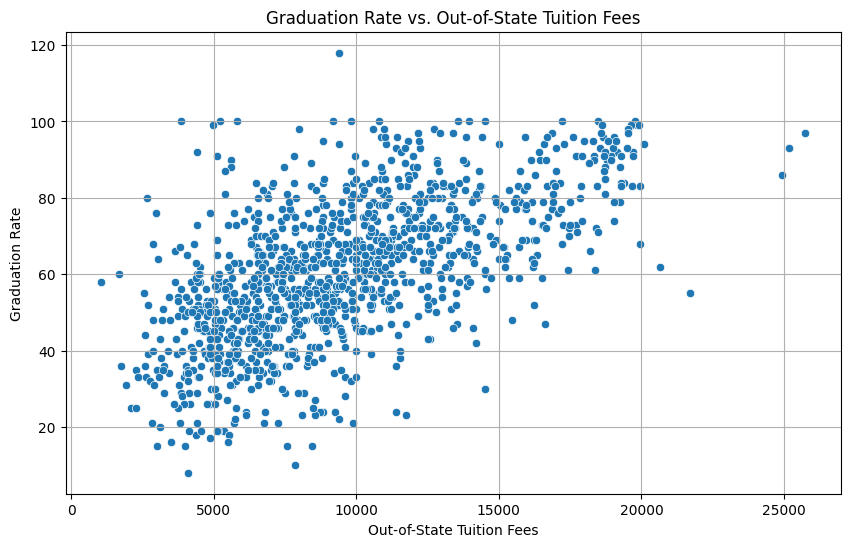

In [29]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=DS['out-of-state tuition'], y=DS['Graduation rate'])
plt.title('Graduation Rate vs. Out-of-State Tuition Fees')
plt.xlabel('Out-of-State Tuition Fees')
plt.ylabel('Graduation Rate')
plt.grid(True)
plt.show()


#Summary
Similar to the previous scatter plot, but for 'out-of-state tuition' on the x-axis.

#**Step -7.5 **
##Visualization 5: . Student/Faculty Ratio vs. Graduation Rate

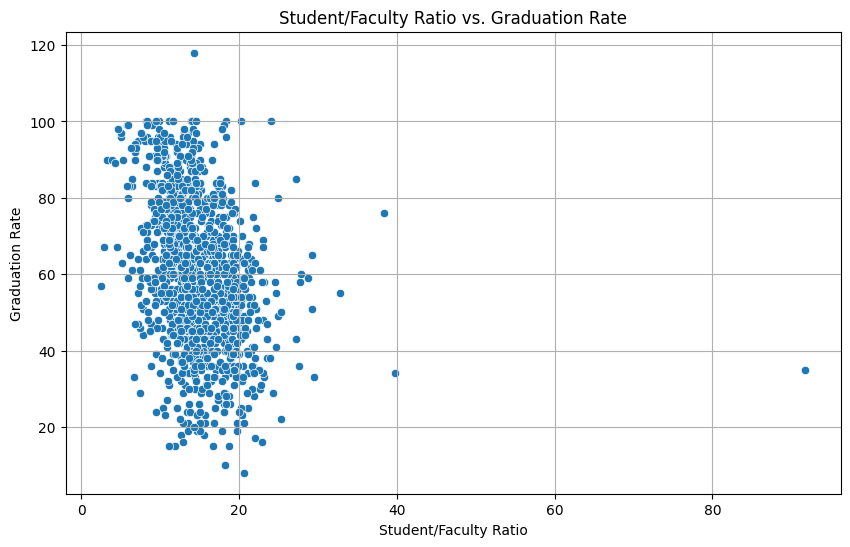

In [30]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=DS['stud./fac. ratio'], y=DS['Graduation rate'])
plt.title('Student/Faculty Ratio vs. Graduation Rate')
plt.xlabel('Student/Faculty Ratio')
plt.ylabel('Graduation Rate')
plt.grid(True)
plt.show()


#Summary
**sns.scatterplot(x=DS['stud./fac. ratio'], y=DS['Graduation rate'])**: Creates a scatter plot with 'stud./fac. ratio' on the x-axis and 'Graduation rate' on the y-axis.

#**Step -7.6 **
##Visualization 6: .  Distribution of Full-Time Undergraduates


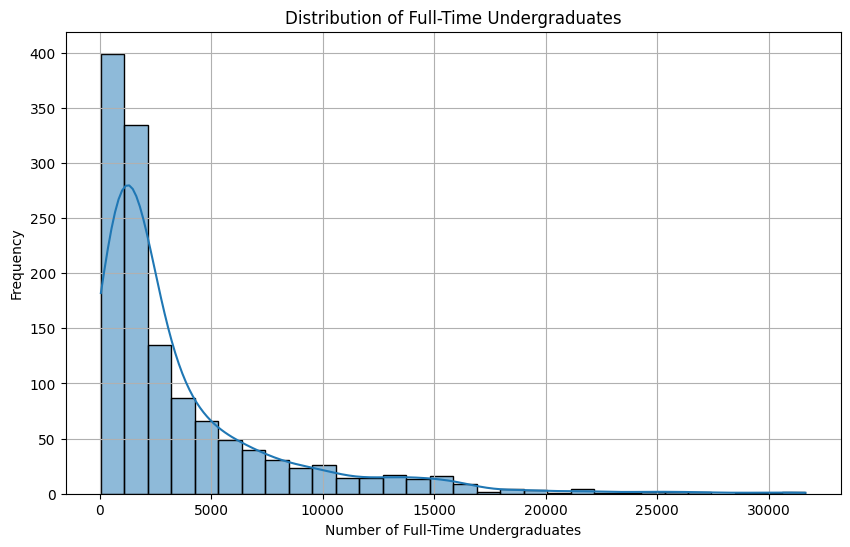

In [31]:

plt.figure(figsize=(10, 6))
sns.histplot(DS['# FT undergrad'], kde=True, bins=30)
plt.title('Distribution of Full-Time Undergraduates')
plt.xlabel('Number of Full-Time Undergraduates')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#Summary
Similar to the first plot, but for the '# FT undergrad' column.

#**Step -7.7 **
##Visualization 7: .  Distribution of Part-Time Undergraduates


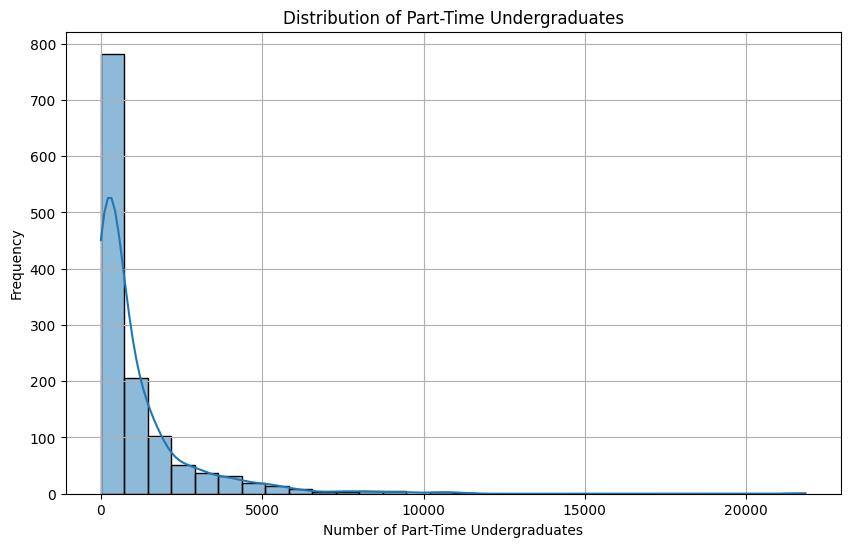

In [32]:

plt.figure(figsize=(10, 6))
sns.histplot(DS['# PT undergrad'], kde=True, bins=30)
plt.title('Distribution of Part-Time Undergraduates')
plt.xlabel('Number of Part-Time Undergraduates')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#Summary
Similar to the first plot, but for the '# PT undergrad' column.

#**Step -7.8 **
##Visualization 8: . Box Plot of In-State and Out-of-State Tuition Fees


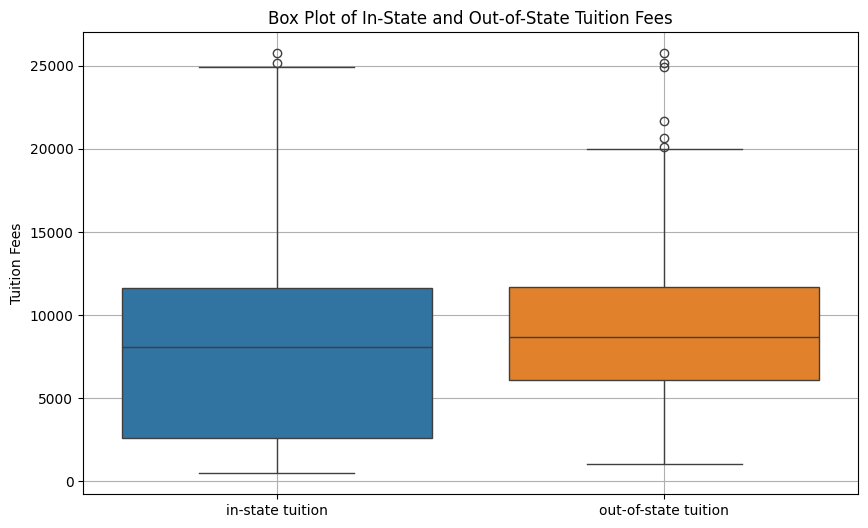

In [34]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=DS[['in-state tuition', 'out-of-state tuition']])
plt.title('Box Plot of In-State and Out-of-State Tuition Fees')
plt.ylabel('Tuition Fees')
plt.grid(True)
plt.show()


#Summary
**sns.boxplot(data=DS[['in-state tuition', 'out-of-state tuition']]):**Creates a box plot for 'in-state tuition' and 'out-of-state tuition' columns.

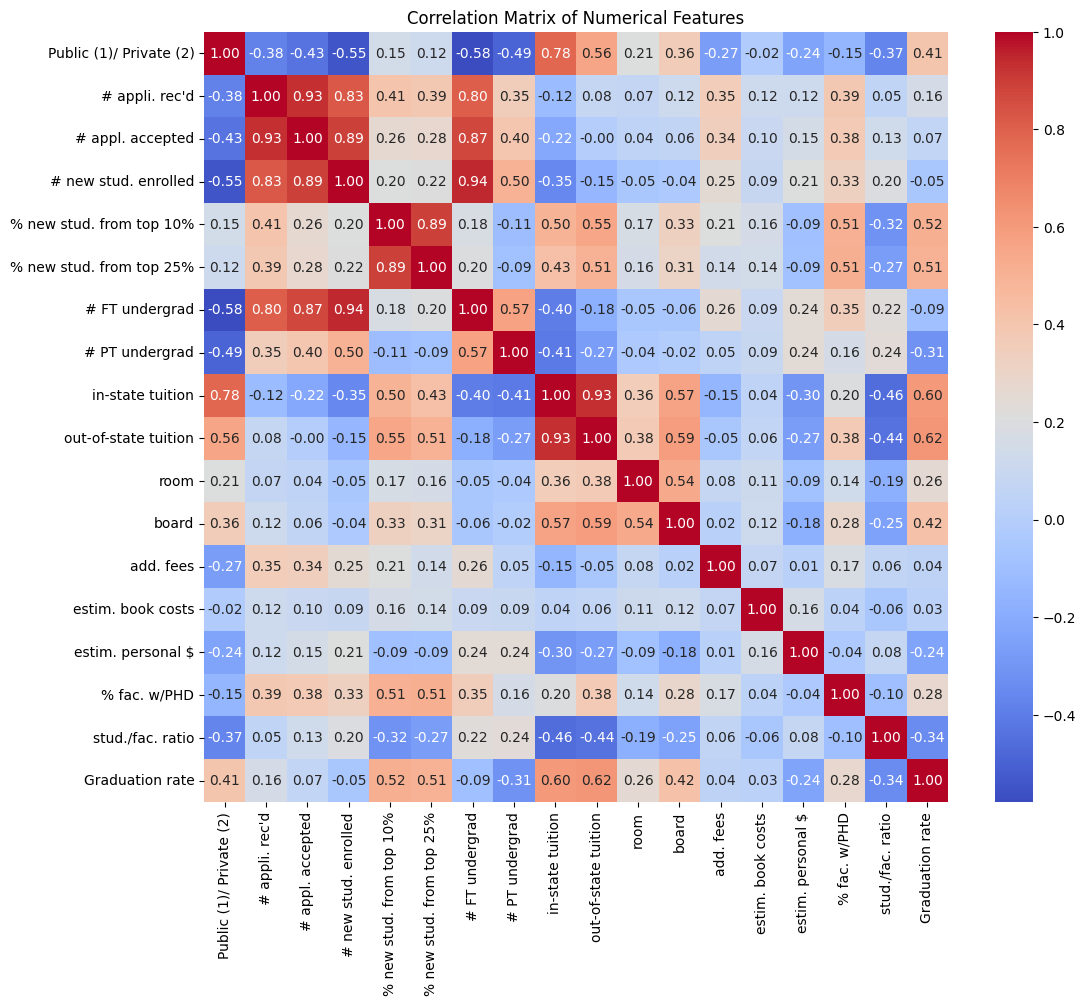

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'DS' DataFrame is already loaded and processed as in the previous code

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation calculation
correlation_matrix = DS.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Summary
**Select Numeric Columns:**

 The line correlation_matrix = DS.select_dtypes(include=['number']).corr() is added. This line uses the select_dtypes() method to filter the DataFrame DS, selecting only columns with numeric data types (int64, float64). This ensures that the corr() function only operates on numerical data, preventing the ValueError.

# **Step - A**
## Remove all records with missing measurements from the dataset

## Remove all records with missing measurements

In [38]:
DS_clean = DS.dropna()

#Summary
DS.dropna(): Removes all records with missing measurements.


## Display the cleaned dataset


In [39]:

print(DS_clean.head())

                      College Name State  Public (1)/ Private (2)  \
0        Alaska Pacific University    AK                        2   
2   University of Alaska Southeast    AK                        1   
9      Birmingham-Southern College    AL                        2   
11              Huntingdon College    AL                        2   
21               Talladega College    AL                        2   

    # appli. rec'd  # appl. accepted  # new stud. enrolled  \
0            193.0             146.0                  55.0   
2            146.0             117.0                  89.0   
9            805.0             588.0                 287.0   
11           608.0             520.0                 127.0   
21          4414.0            1500.0                 335.0   

    % new stud. from top 10%  % new stud. from top 25%  # FT undergrad  \
0                       16.0                      44.0           249.0   
2                        4.0                      24.0          

# Summary
print(DS_clean.head()): Displays the first few rows of the cleaned dataset.

# Step-B
## Normalize the continuous measurements and run hierarchical clustering using complete linkage and Euclidean distance

## Select continuous measurements (excluding categorical columns

In [43]:

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

continuous_cols = DS_clean.select_dtypes(include=['number']).columns



# Normalize the continuous measurements


In [44]:

scaler = StandardScaler()
DS_normalized = scaler.fit_transform(DS_clean[continuous_cols])



# Perform hierarchical clustering using complete linkage and Euclidean distance


In [45]:

linked = linkage(DS_normalized, method='complete', metric='euclidean')



# Plot the dendrogram to visualize the clusters


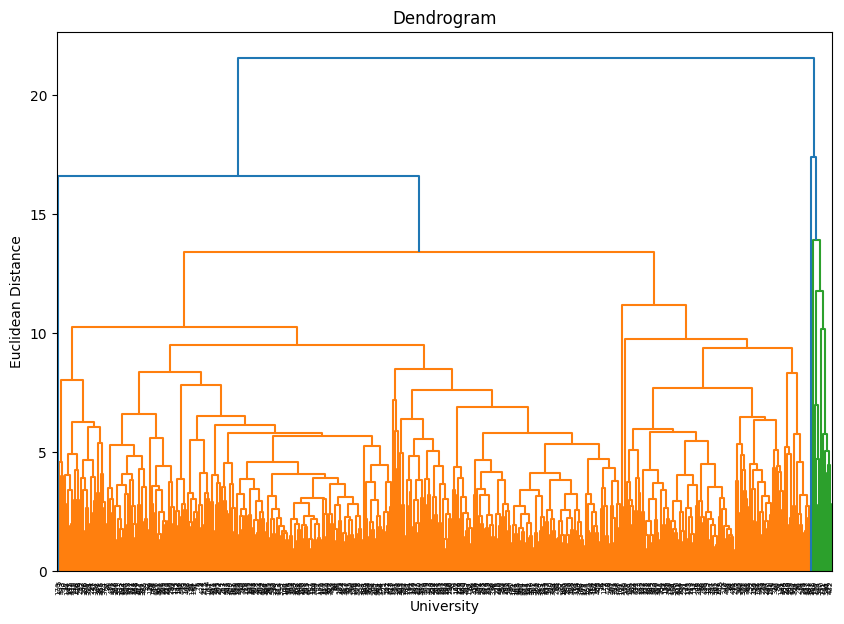

In [46]:

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('University')
plt.ylabel('Euclidean Distance')
plt.show()


#Summary
**StandardScaler():** Initializes the scaler for normalization.

**scaler.fit_transform(DS_clean[continuous_cols]):** Normalizes the continuous measurements.

**linkage(DS_normalized, method='complete', metric='euclidean'):** Performs hierarchical clustering using complete linkage and Euclidean distance.

**dendrogram(linked):** Plots the dendrogram to visualize the clusters.

#Step -C
## Compare the summary statistics for each cluster and describe each cluster in this context

In [48]:
from scipy.cluster.hierarchy import fcluster

## Determine the number of clusters from the dendrogram (e.g., 5 clusters)

In [47]:

num_clusters = 5



## Assign cluster labels to each record


In [49]:

DS_clean['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')


<ipython-input-49-354419ac5126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DS_clean['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')


## Calculate summary statistics for each cluster

In [51]:
# Calculate summary statistics for each cluster, excluding non-numeric columns
cluster_summary = DS_clean.groupby('Cluster').agg({col: 'mean' for col in DS_clean.select_dtypes(include=['number']).columns})


## Display the summary statistics for each cluster


In [52]:
print(cluster_summary)

         Public (1)/ Private (2)  # appli. rec'd  # appl. accepted  \
Cluster                                                              
1                       1.739606     2752.124726       1793.078775   
2                       2.000000      601.000000        396.000000   
3                       1.363636    14991.818182      10826.545455   
4                       1.000000    48094.000000      26330.000000   
5                       1.000000    11054.000000       6397.000000   

         # new stud. enrolled  % new stud. from top 10%  \
Cluster                                                   
1                  684.503282                 27.868709   
2                  203.000000                  1.000000   
3                 4240.636364                 35.909091   
4                 4520.000000                 36.000000   
5                 3524.000000                 26.000000   

         % new stud. from top 25%  # FT undergrad  # PT undergrad  \
Cluster                   

#Summary
**fcluster(linked, num_clusters, criterion='maxclust'):** Assigns cluster labels to each record based on the number of clusters.

**DS_clean.groupby('Cluster').mean():** Calculates summary statistics for each cluster.

**print(cluster_summary):** Displays the summary statistics for each cluster.

#Step-D
##Use the categorical measurements to characterize the different clusters


## Calculate the distribution of categorical measurements within each cluster


In [53]:

state_distribution = DS_clean.groupby(['Cluster', 'State']).size().unstack(fill_value=0)
public_private_distribution = DS_clean.groupby(['Cluster', 'Public (1)/ Private (2)']).size().unstack(fill_value=0)



## Display the distribution of categorical measurements within each cluster


In [54]:

print(state_distribution)
print(public_private_distribution)


State    AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Cluster                                          ...                           
1         2   4   4   1  14   6  10   4   2   8  ...   4  15  18   2  15   7   
2         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
3         0   0   0   1   1   0   0   0   0   0  ...   0   0   2   0   0   0   
4         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
5         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

State    WA  WI  WV  WY  
Cluster                  
1         2   9   2   1  
2         0   0   0   0  
3         0   0   0   0  
4         0   0   0   0  
5         0   0   0   0  

[5 rows x 50 columns]
Public (1)/ Private (2)    1    2
Cluster                          
1                        119  338
2                          0    1
3                          7    4
4                          1    0
5                          1  

#Summary
**DS_clean.groupby(['Cluster', 'State']).size().unstack(fill_value=0): **Calculates the distribution of states within each cluster.

**DS_clean.groupby(['Cluster', 'Public (1)/ Private (2)']).size().unstack(fill_value=0):** Calculates the distribution of public/private universities within each cluster.

**print(state_distribution):** Displays the distribution of states within each cluster.

**print(public_private_distribution):** Displays the distribution of public/private universities within each cluster.

#Step -E
## External information that can explain the contents of some or all of these clusters

#Summary
This step requires external data or domain knowledge, so it's not included in the code. You can consider factors such as regional economic conditions, historical significance, or specific educational programs offered by the universities.

#Step-F
## Impute missing values for Tufts University by finding the closest cluster

In [55]:

import numpy as np



## Example record for Tufts University with some missing values (replace with actual data)


In [56]:

tufts_record = DS.loc[DS['College Name'] == 'Tufts University'].dropna(axis=1)



## Compute Euclidean distance from Tufts record to each cluster centroid


In [61]:
# Example record for Tufts University with some missing values (replace with actual data)
tufts_record = DS.loc[DS['College Name'] == 'Tufts University']
# Ensure shared_cols are in the same order as continuous_cols
shared_cols = [col for col in continuous_cols if col in tufts_record.columns]

# Compute Euclidean distance from Tufts record to each cluster centroid
tufts_normalized = scaler.transform(tufts_record[shared_cols])
cluster_centroids = cluster_summary[shared_cols].values

distances = np.linalg.norm(cluster_centroids - tufts_normalized, axis=1)
closest_cluster = np.argmin(distances) + 1


## Impute missing values for Tufts by taking the average of the closest cluster on those measurements


In [63]:
tufts_imputed = tufts_record.copy()
for col in continuous_cols:
    if col not in tufts_record.columns:
        tufts_imputed[col] = cluster_summary.loc[closest_cluster, col]

print(tufts_imputed)

print(tufts_imputed)


         College Name State  Public (1)/ Private (2)  # appli. rec'd  \
475  Tufts University    MA                        2          7614.0   

     # appl. accepted  # new stud. enrolled  % new stud. from top 10%  \
475            3605.0                1205.0                      60.0   

     % new stud. from top 25%  # FT undergrad  # PT undergrad  \
475                      90.0          4598.0             NaN   

     in-state tuition  out-of-state tuition    room   board  add. fees  \
475           19701.0               19701.0  3038.0  2930.0      503.0   

     estim. book costs  estim. personal $  % fac. w/PHD  stud./fac. ratio  \
475              600.0              928.0          99.0              10.3   

     Graduation rate  
475             92.0  
         College Name State  Public (1)/ Private (2)  # appli. rec'd  \
475  Tufts University    MA                        2          7614.0   

     # appl. accepted  # new stud. enrolled  % new stud. from top 10%  \
475      

#Summary
**DS.loc[DS['College Name'] == 'Tufts University'].dropna(axis=1):** Selects the record for Tufts University and drops columns with missing values.

**scaler.transform(tufts_record[continuous_cols]):** Normalizes the Tufts record.

**np.linalg.norm(cluster_centroids - tufts_normalized, axis=1)**: Computes the Euclidean distance from Tufts record to each cluster centroid.

**np.argmin(distances) + 1:** Finds the closest cluster to Tufts University.

**tufts_imputed[col] = cluster_summary.loc[closest_cluster, col]:** Imputes missing values for Tufts by taking the average of the closest cluster on those measurements.